In [1]:
'''Classification using Deep neural network (Any One from the following)
1. Multiclass classification using Deep Neural Networks: Example: Use the OCR letter
recognition datasethttps://archive.ics.uci.edu/ml/datasets/letter+recognition
2. Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset'''

'Classification using Deep neural network (Any One from the following)\n1. Multiclass classification using Deep Neural Networks: Example: Use the OCR letter\nrecognition datasethttps://archive.ics.uci.edu/ml/datasets/letter+recognition\n2. Binary classification using Deep Neural Networks Example: Classify movie reviews into\npositive" reviews and "negative" reviews, just based on the text content of the reviews.\nUse IMDB dataset'

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

In [3]:
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
columns= ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar',
          'x-ege', 'xegvy', 'y-ege', 'yegvx']
df= pd.read_csv(url, header= None, names= columns)

In [4]:
label_encoder= LabelEncoder()
y_encoded= label_encoder.fit_transform(df['letter'])
y_categorical= to_categorical(y_encoded)

In [5]:
x= df.drop('letter', axis=1).values

In [6]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_categorical, test_size=0.2, random_state=42)

In [14]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(x_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [15]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [16]:
history= model.fit(x_train, y_train, epochs= 20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4233 - loss: 2.1396 - val_accuracy: 0.7594 - val_loss: 0.8253
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7795 - loss: 0.7530 - val_accuracy: 0.8306 - val_loss: 0.5931
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8372 - loss: 0.5619 - val_accuracy: 0.8550 - val_loss: 0.4840
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8671 - loss: 0.4464 - val_accuracy: 0.8750 - val_loss: 0.4008
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8919 - loss: 0.3630 - val_accuracy: 0.8944 - val_loss: 0.3499
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9072 - loss: 0.3176 - val_accuracy: 0.9050 - val_loss: 0.3120
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9189 - loss: 0.2780 - val_accuracy: 0.9125 - val_loss: 0.2783
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9275 - loss: 0.2389 - val_accuracy: 0.

In [17]:
loss, accuracy= model.evaluate(x_test, y_test)
print(f"\n Test Accuracy: {accuracy:.2f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.1495

 Test Accuracy: 0.95


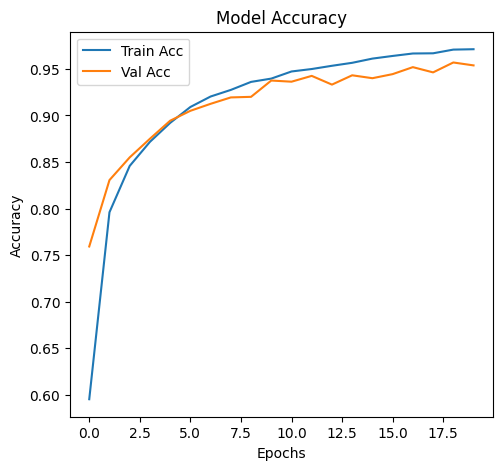

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

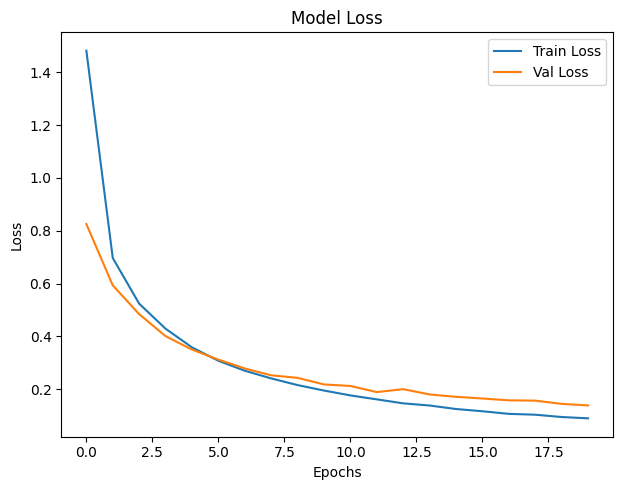

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()